![Vidi_Waterflux_Banner](https://raw.githubusercontent.com/ITC-Water-Resources/Vidi-waterflux-merch/refs/heads/main/jupyter/Vidi_Waterflux_Banner.png)
*Roelof Rietbroek, Sedigheh Karimi, Amin Shakya EGU 2025*

# 1. Extract GLOFAS discharge at points of interest

In [14]:
import xarray as xr
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
points_fn = '../data/glofasv4_discharge_locations.gpkg'
nsr_fn = '../data/glofas4_nsr_1979_2025.nc'
hoa_fn = '../data/glofas4_hoa_1979_2025.nc'

NSR and HOA bounds definition

In [3]:
nsr_bounds = [-5.0, 45.5, 15.5, 63.5,]
hoa_bounds = [7.0, -20.5, 60.5, 31.5,]

In [4]:
points_gdf = gpd.read_file(points_fn)
points_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
479,GOBI DESERT,2,5612,953,7.298325e+10,POINT (100.57500 42.37500)
480,TIBETAN PLATEAU,2,5382,1169,4.499326e+10,POINT (89.07500 31.57500)
481,TIBETAN PLATEAU,2,5383,1168,4.351758e+10,POINT (89.12500 31.62500)
482,TIBETAN PLATEAU,2,5383,1167,4.349128e+10,POINT (89.12500 31.67500)


<AxesSubplot: >

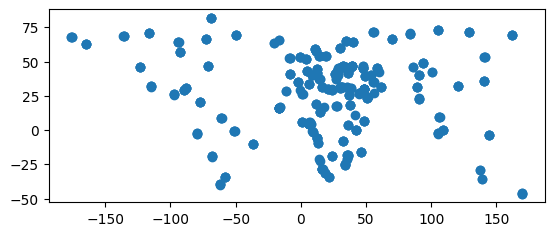

In [5]:
points_gdf.plot()

In [6]:
nsr_ds = xr.open_dataset(nsr_fn)
nsr_ds

<xarray.Dataset>
Dimensions:     (time: 16833, latitude: 410, longitude: 360)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 15.47 15.42 15.37 ... -4.875 -4.925 -4.975
  * longitude   (longitude) float64 45.52 45.57 45.62 ... 63.37 63.42 63.47
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-15T14:37 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
hoa_ds = xr.open_dataset(hoa_fn)
hoa_ds

<xarray.Dataset>
Dimensions:     (time: 16833, latitude: 1070, longitude: 1040)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 60.48 60.43 60.38 60.33 ... 7.125 7.075 7.025
  * longitude   (longitude) float64 -20.48 -20.43 -20.38 ... 31.38 31.43 31.48
    valid_time  (time) datetime64[ns] ...
Data variables:
    dis24       (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-04-15T14:45 GRIB to CDM+CF via cfgrib-0.9.1...

## 01. Process for NSR, get discharge at Points of Interest

In [8]:
# Filter by bounds
minx, miny, maxx, maxy = nsr_bounds
points_nsr_gdf = points_gdf.cx[minx:maxx, miny:maxy]

In [9]:
points_nsr_gdf

,name,endo,x,y,upstream_area,geometry
204,RHINE,0,3683,764,1.965476e+11,POINT (4.12500 51.82500)
205,RHINE,0,3684,765,1.964710e+11,POINT (4.17500 51.77500)
206,RHINE,0,3685,765,1.964326e+11,POINT (4.22500 51.77500)
207,RHINE,0,3686,766,1.962216e+11,POINT (4.27500 51.72500)
208,GUDENA,0,3886,722,1.316110e+11,POINT (14.27500 53.92500)
209,GUDENA,0,3886,723,1.315928e+11,POINT (14.27500 53.87500)
210,GUDENA,0,3887,724,1.314830e+11,POINT (14.32500 53.82500)
211,GUDENA,0,3878,724,5.846508e+09,POINT (13.87500 53.82500)
220,ANGERMAN,0,3837,647,5.119166e+10,POINT (11.82500 57.67500)
221,ANGERMAN,0,3838,647,5.115845e+10,POINT (11.87500 57.67500)


In [27]:
values = []
for i in range(len(points_nsr_gdf)):
    point = points_nsr_gdf.geometry.iloc[i]
    lon, lat = point.x, point.y
    value = nsr_ds.sel(longitude=lon, latitude=lat, method='nearest').dis24
    
    columns_to_retain = ['name', 'endo', 'upstream_area']
    retained_columns = points_nsr_gdf[columns_to_retain] #.reset_index(drop = True)
    values_at_index = retained_columns.iloc[i]
    
    # Assign attrs and coords
    value.attrs['name'] = values_at_index['name']
    value.attrs['endo'] = values_at_index['endo']
    value.attrs['upstream_area'] = values_at_index['upstream_area']
    value = value.assign_coords(index=points_nsr_gdf.index[i])    
    # Append all timeseries into a list
    values.append(value)
    
combined_nsr_xr = xr.concat(values, dim='index')

combined_nsr_xr.to_netcdf('../data/outlet_dis24_nsr.nc')

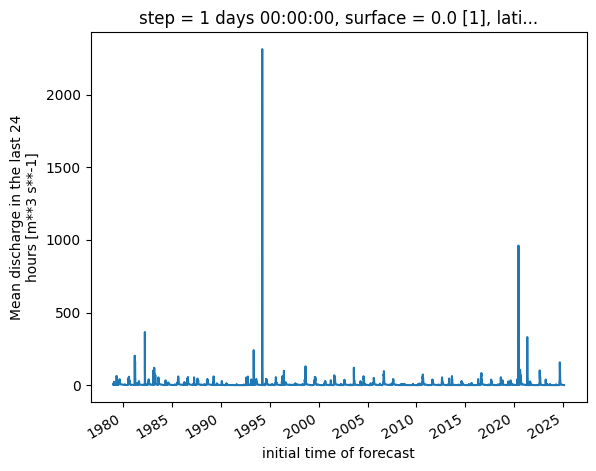

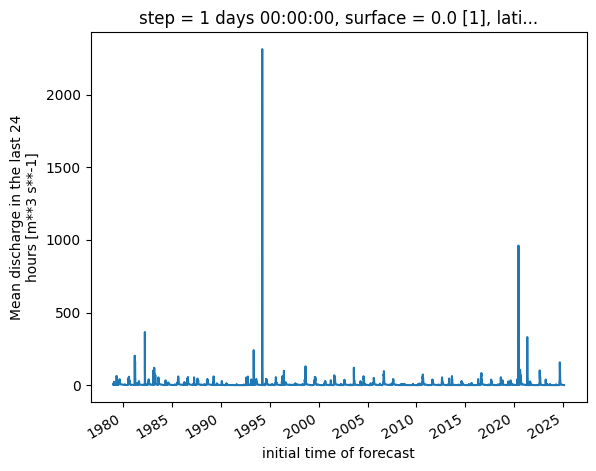

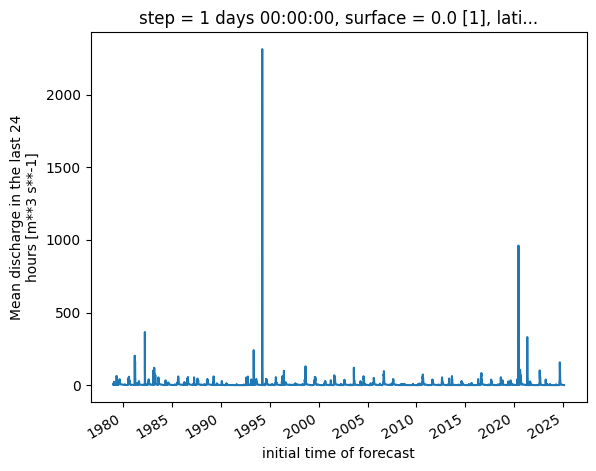

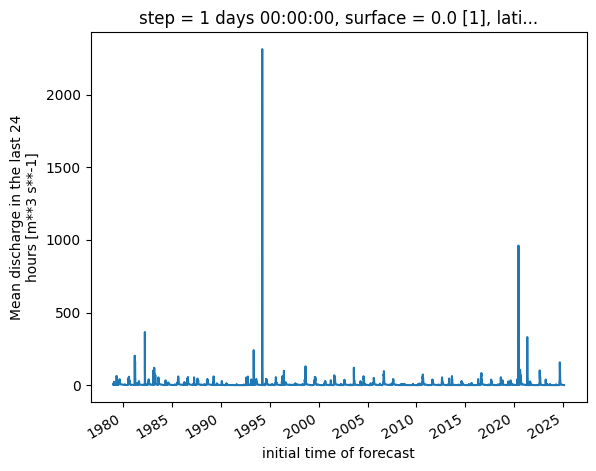

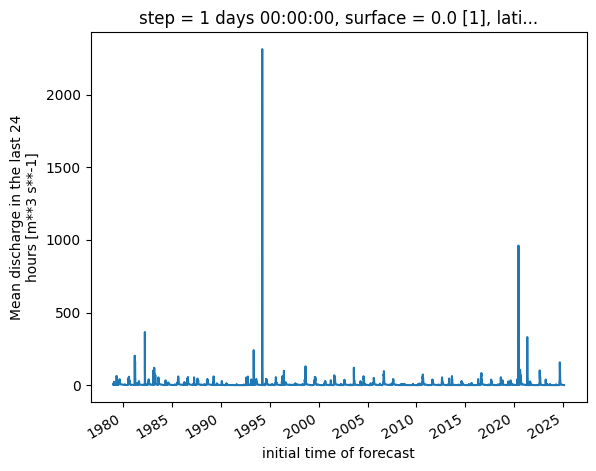

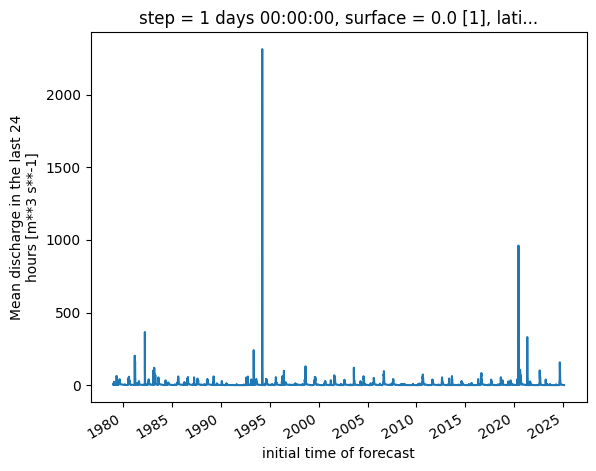

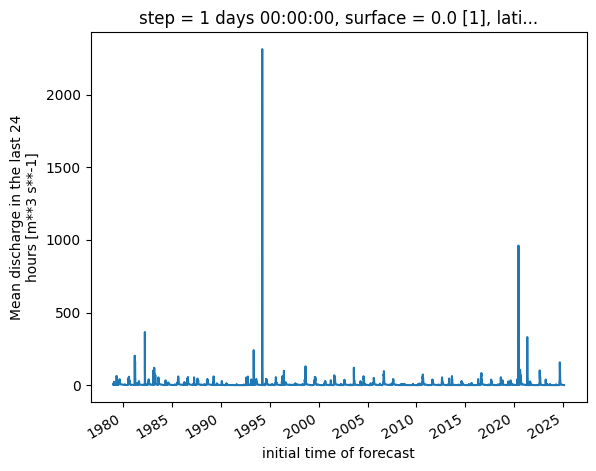

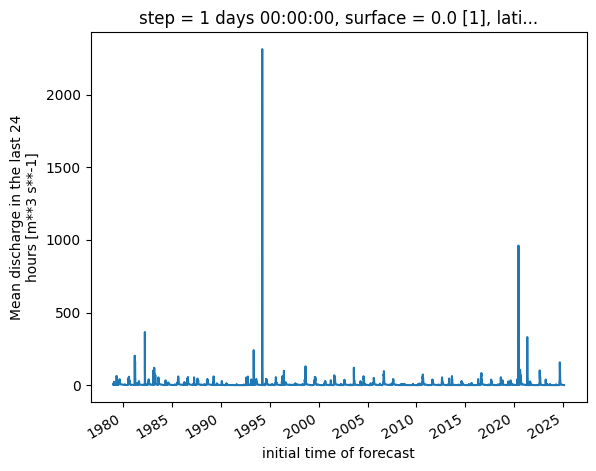

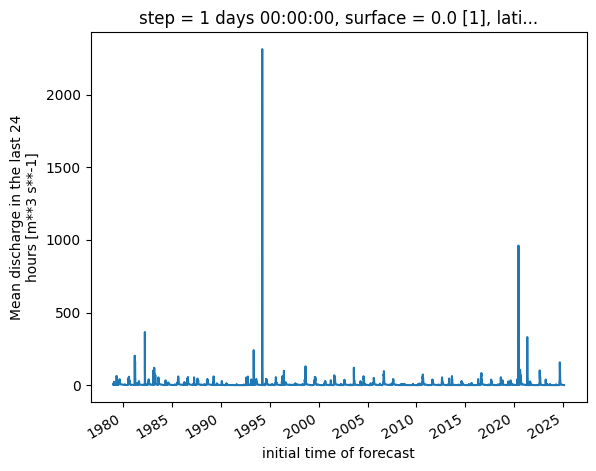

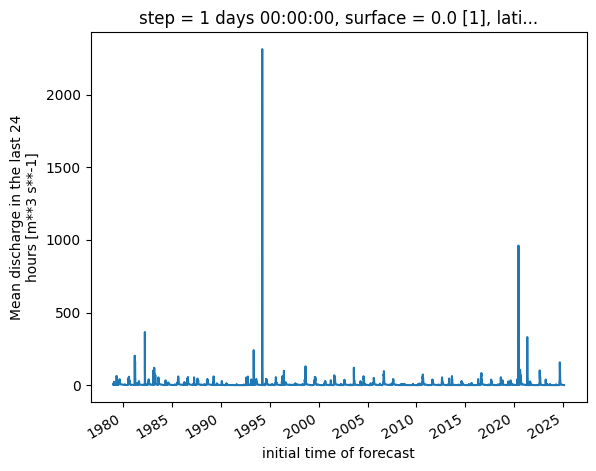

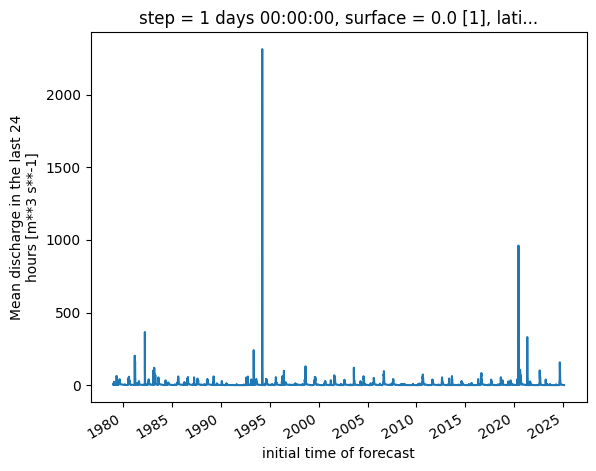

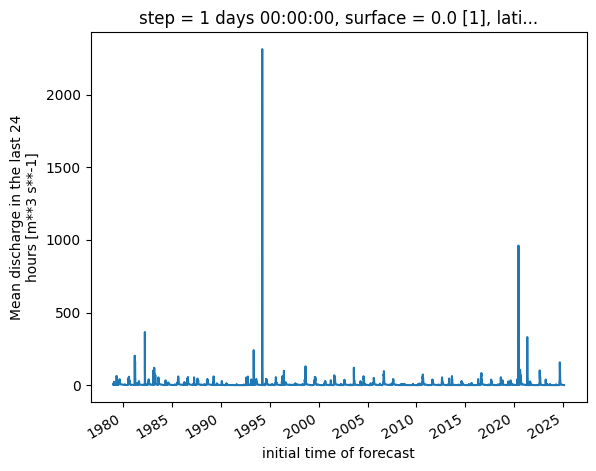

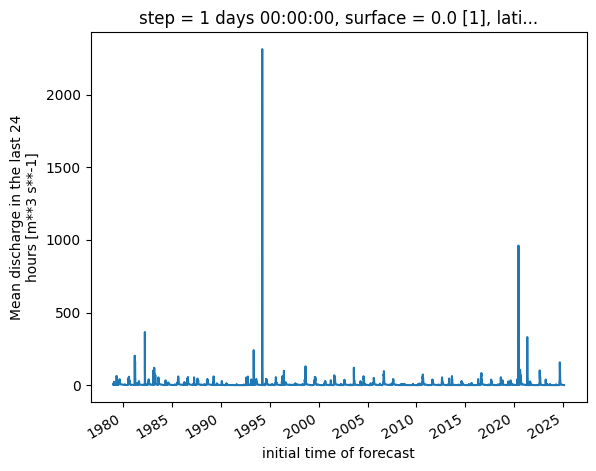

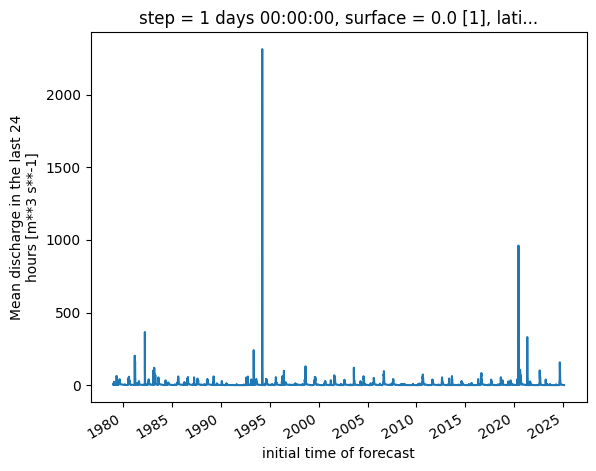

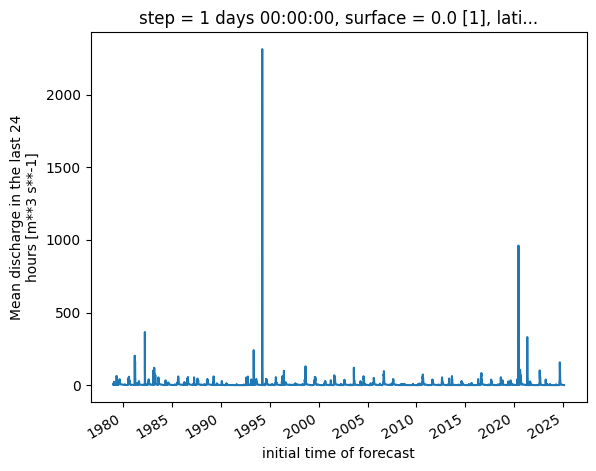

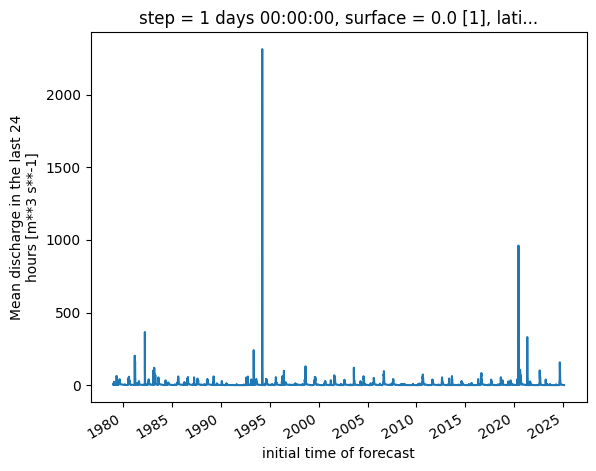

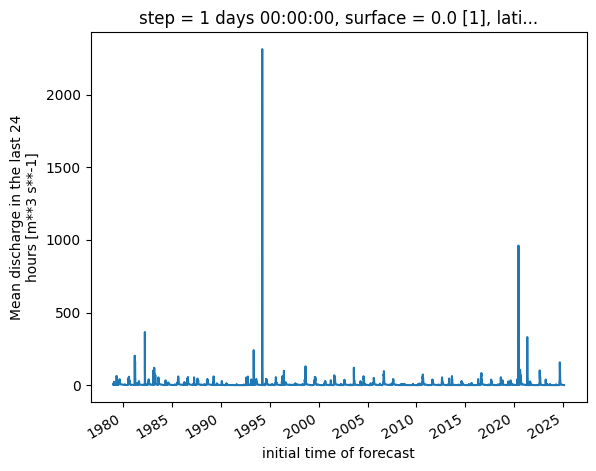

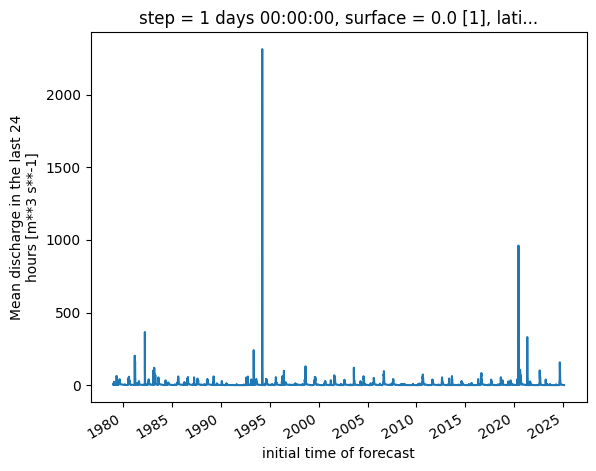

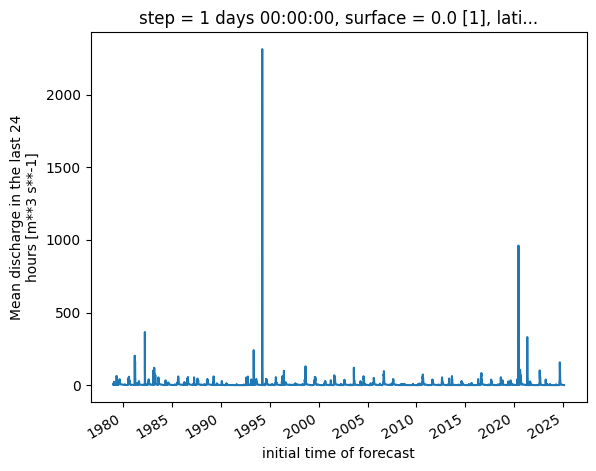

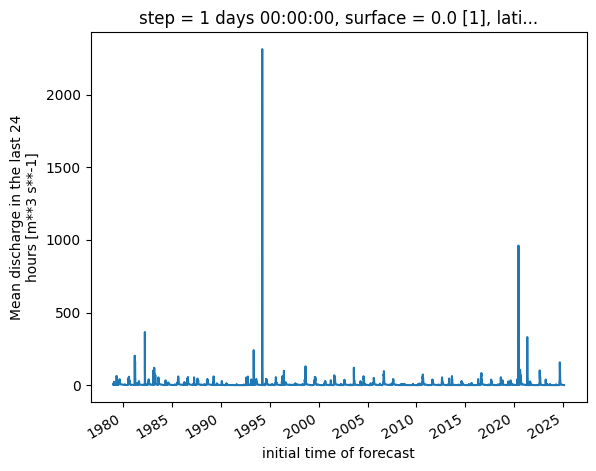

In [26]:
for v in values:
    plt.figure()
    v.plot()
    plt.show()

In [11]:
combined_nsr_xr

<xarray.DataArray 'dis24' (index: 20, time: 16833)>
array([[3.734375, 3.6875  , 3.671875, ..., 0.      , 0.      , 0.      ],
       [3.734375, 3.6875  , 3.671875, ..., 0.      , 0.      , 0.      ],
       [3.734375, 3.6875  , 3.671875, ..., 0.      , 0.      , 0.      ],
       ...,
       [3.734375, 3.6875  , 3.671875, ..., 0.      , 0.      , 0.      ],
       [3.734375, 3.6875  , 3.671875, ..., 0.      , 0.      , 0.      ],
       [3.734375, 3.6875  , 3.671875, ..., 0.      , 0.      , 0.      ]],
      dtype=float32)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] 1 days
    surface     float64 0.0
    latitude    float64 15.47
    longitude   float64 45.52
    valid_time  (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2025-02-01
  * index       (index) int64 204 205 206 207 208 209 ... 227 244 245 246 247
Attributes:
    GRIB_paramId:                             240024
    GRIB_dataType:                            sfo
    GRIB_numberOfPoints:                      147600
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  410
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           dis24
    GRIB_gridDefinitionDescription:           Latitude/longitude
    GRIB_iDirectionIncrementInDegrees:        0.05
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.05
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   15.475
    GRIB_latitudeOfLastGridPointInDegrees:    -4.975
    GRIB_longitudeOfFirstGridPointInDegrees:  45.525
    GRIB_longitudeOfLastGridPointInDegrees:   63.475
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean discharge in the last 24 h...
    GRIB_shortName:                           dis24
    GRIB_units:                               m**3 s**-1
    long_name:                                Mean discharge in the last 24 h...
    units:                                    m**3 s**-1
    standard_name:                            unknown
    name:                                     RHINE
    endo:                                     0
    upstream_area:                            196547641344.0

## 01. Process for HoA, get discharge at Points of Interest

In [28]:
# Filter by bounds
minx, miny, maxx, maxy = hoa_bounds
points_hoa_gdf = points_gdf.cx[minx:maxx, miny:maxy] # Coordinate based indexer to select by intersection with bounding box.

In [29]:
points_hoa_gdf

,name,endo,x,y,upstream_area,geometry
0,SETIT,0,4358,1429,6.373512e+10,POINT (37.87500 18.57500)
1,SETIT,0,4357,1429,6.367669e+10,POINT (37.82500 18.57500)
2,SETIT,0,4356,1429,6.364749e+10,POINT (37.77500 18.57500)
3,SETIT,0,4356,1430,6.347212e+10,POINT (37.77500 18.52500)
4,GULF OF ADEN/SOMALIA,0,4573,1672,1.184632e+11,POINT (48.62500 6.42500)
...,...,...,...,...,...,...
307,NORTHERN ARABIAN DESERT,2,4486,1266,9.547251e+10,POINT (44.27500 26.72500)
308,DEAD SEA,2,4309,1171,4.405485e+10,POINT (35.42500 31.47500)
309,DEAD SEA,2,4310,1172,4.371268e+10,POINT (35.47500 31.42500)
310,DEAD SEA,2,4362,1184,3.087077e+10,POINT (38.07500 30.82500)


In [31]:
values = []
for i in range(len(points_hoa_gdf)):
    point = points_hoa_gdf.geometry.iloc[i]
    lon, lat = point.x, point.y
    value = hoa_ds.sel(longitude=lon, latitude=lat, method='nearest').dis24
    
    columns_to_retain = ['name', 'endo', 'upstream_area']
    retained_columns = points_hoa_gdf[columns_to_retain] #.reset_index(drop = True)
    values_at_index = retained_columns.iloc[i]
    
    # Assign attrs and coords
    value.attrs['name'] = values_at_index['name']
    value.attrs['endo'] = values_at_index['endo']
    value.attrs['upstream_area'] = values_at_index['upstream_area']
    value = value.assign_coords(index=points_hoa_gdf.index[i])    
    # Append all timeseries into a list
    values.append(value)
    
combined_hoa_xr = xr.concat(values, dim='index')

combined_hoa_xr.to_netcdf('../data/outlet_dis24_hoa.nc')

In [32]:
combined_hoa_xr

<xarray.DataArray 'dis24' (index: 114, time: 16833)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * time        (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2025-01-31
    step        timedelta64[ns] 1 days
    surface     float64 0.0
    latitude    (index) float64 18.58 18.58 18.58 18.53 ... 31.43 30.83 30.78
    longitude   (index) float64 31.48 31.48 31.48 31.48 ... 31.48 31.48 31.48
    valid_time  (time) datetime64[ns] 1979-01-02 1979-01-03 ... 2025-02-01
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 305 306 307 308 309 310 311
Attributes:
    GRIB_paramId:                             240024
    GRIB_dataType:                            sfo
    GRIB_numberOfPoints:                      1112800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  1040
    GRIB_Ny:                                  1070
    GRIB_cfName:                              unknown
    GRIB_cfVarName:                           dis24
    GRIB_gridDefinitionDescription:           Latitude/longitude
    GRIB_iDirectionIncrementInDegrees:        0.05
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        0.05
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   60.475
    GRIB_latitudeOfLastGridPointInDegrees:    7.025
    GRIB_longitudeOfFirstGridPointInDegrees:  339.525
    GRIB_longitudeOfLastGridPointInDegrees:   31.475
    GRIB_missingValue:                        9999
    GRIB_name:                                Mean discharge in the last 24 h...
    GRIB_shortName:                           dis24
    GRIB_units:                               m**3 s**-1
    long_name:                                Mean discharge in the last 24 h...
    units:                                    m**3 s**-1
    standard_name:                            unknown
    name:                                     SETIT
    endo:                                     0
    upstream_area:                            63735119872.0